In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [107]:
data = load_boston()

print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [108]:
full_data = pd.DataFrame(data=data.data, columns=data.feature_names)
full_data['PRICE'] = data.target
full_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Clean Data

In [109]:
full_data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [110]:
# check if there is missing data in columns 
full_data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [111]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualization

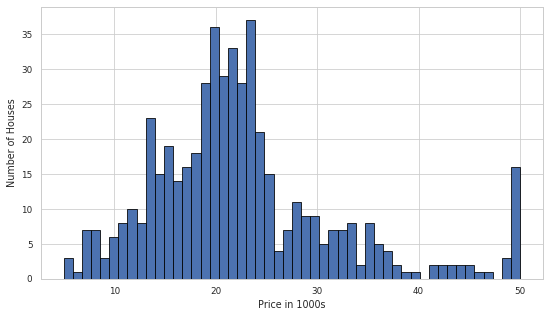

In [112]:
plt.figure(figsize=[9,5])
plt.hist(full_data.PRICE,bins=50,ec='black')
plt.xlabel('Price in 1000s')
plt.ylabel('Number of Houses')
plt.show()

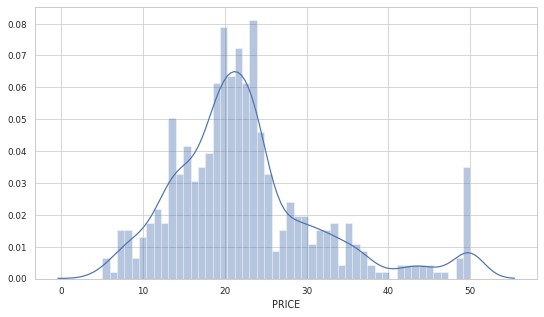

In [113]:
plt.figure(figsize=[9,5])
sb.distplot(full_data.PRICE, bins=50)
plt.show()

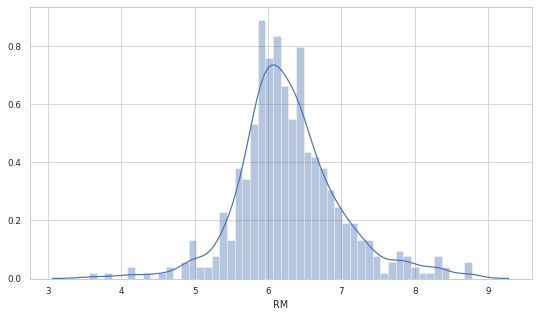

In [114]:
plt.figure(figsize=[9,5])
sb.distplot(full_data.RM, bins=50)
plt.show()

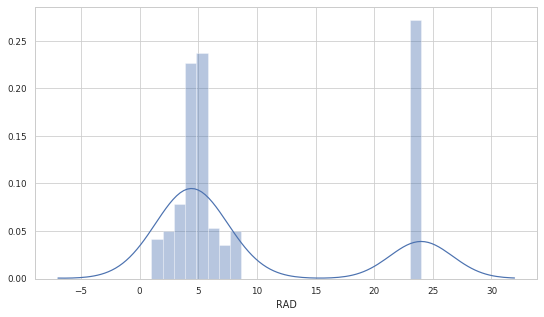

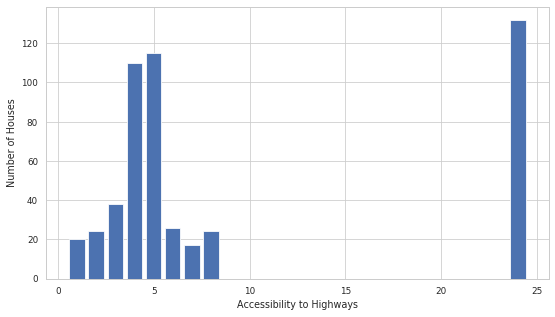

In [115]:
plt.figure(figsize=[9,5])
sb.distplot(full_data.RAD, bins=24)
plt.show()

frequency = full_data.RAD.value_counts()

#frequency.index
plt.figure(figsize=[9,5])
plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Houses')
plt.bar(frequency.index,height=frequency)
plt.show()

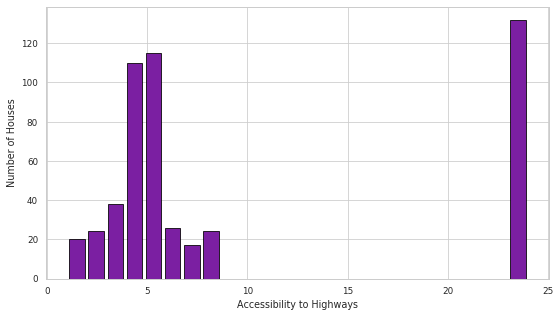

In [116]:
plt.figure(figsize=[9,5])
plt.hist(full_data.RAD, bins=24, ec='black', color='#7b1fa2', rwidth=0.8)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Houses')
plt.show()


In [117]:
# A(CHAS) type feature is referred to as a dummy variable.
# Dummy variables are used to capture binary information. 
# Working with a dummy variable is similar to working with an
# index, except a dummy variable can only have one of two values
full_data.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [118]:
# Descriptive statistics are brief descriptive coefficients that
# summarize a given data set, which can be either a representation
# of the entire or a sample of a populaiton. Descriptive statistics 
# are broken down into measures of central tendency and measures o f
# variability (spread).

full_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [119]:
full_data.PRICE.min()
full_data.PRICE.max()
full_data.PRICE.mean()
full_data.PRICE.median()

21.2

# Correlation
## $$ \rho _{XY} = corr(x,y)$$
## $$ -1.0 \leq \rho _{XY} \leq 1.0$$


In [120]:
# How much does RM correlate with price?
full_data.PRICE.corr(full_data.RM)

0.6953599470715386

In [121]:
# How much does PTRATIO correlate with price?
# As the PTRATIO goes up the price goes down
full_data.PRICE.corr(full_data.PTRATIO)

-0.5077866855375616

In [122]:
# Full correlate of complete data set
corr = full_data.corr() # Pearson Correlation Coefficients

In [123]:
mask = np.zeros_like(full_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

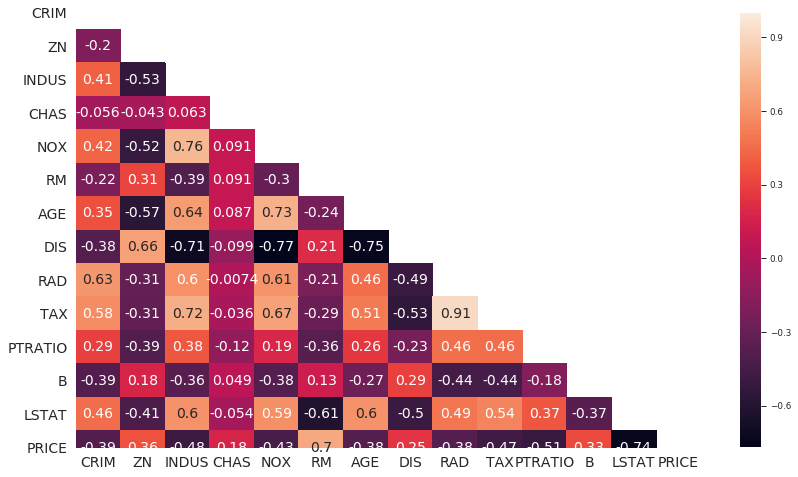

In [124]:
# Correlation Matrix
plt.figure(figsize=(14,8))
sb.heatmap(corr,mask=mask, annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

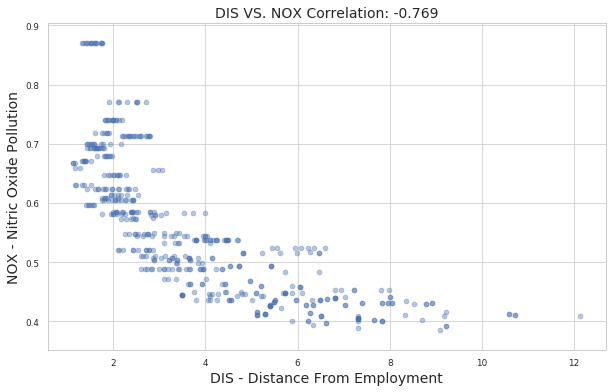

In [125]:
# Challenge: Picture the relationship between 
# pollution and distance in your mind 
# Create a scatter plot between DIS and NOX 
x = full_data.DIS
y = full_data.NOX
nox_dis_corr = round(full_data.NOX.corr(full_data.DIS), 3)

plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.4)
plt.title(f'DIS VS. NOX Correlation: {nox_dis_corr}', fontsize=14)
plt.xlabel('DIS - Distance From Employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()

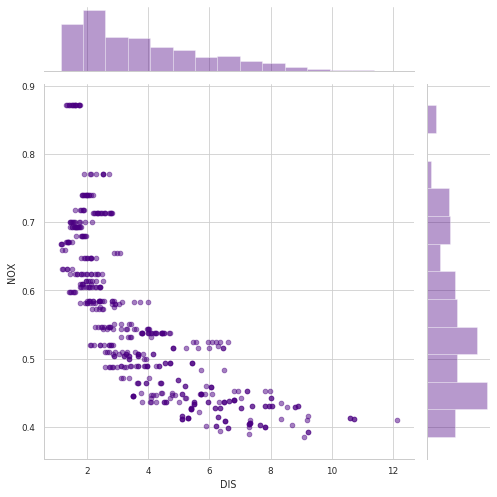

In [126]:
sb.set() # reset to default styling
sb.set_context('paper')
sb.set_style('whitegrid')
sb.jointplot(x,y,height=7,color='indigo',joint_kws={'alpha':0.5})
plt.show()

/home/zidakin/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


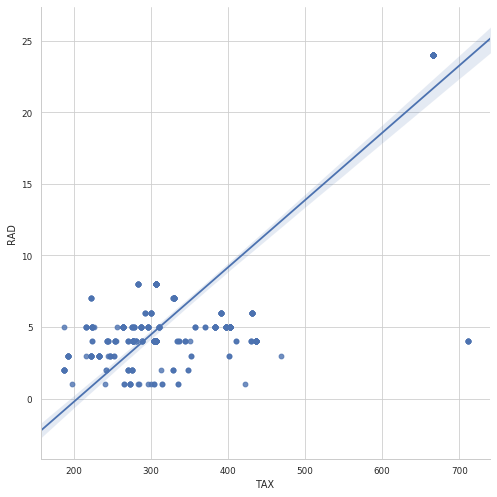

In [127]:
sb.lmplot(x='TAX',y='RAD', data=full_data, size=7)
plt.show()

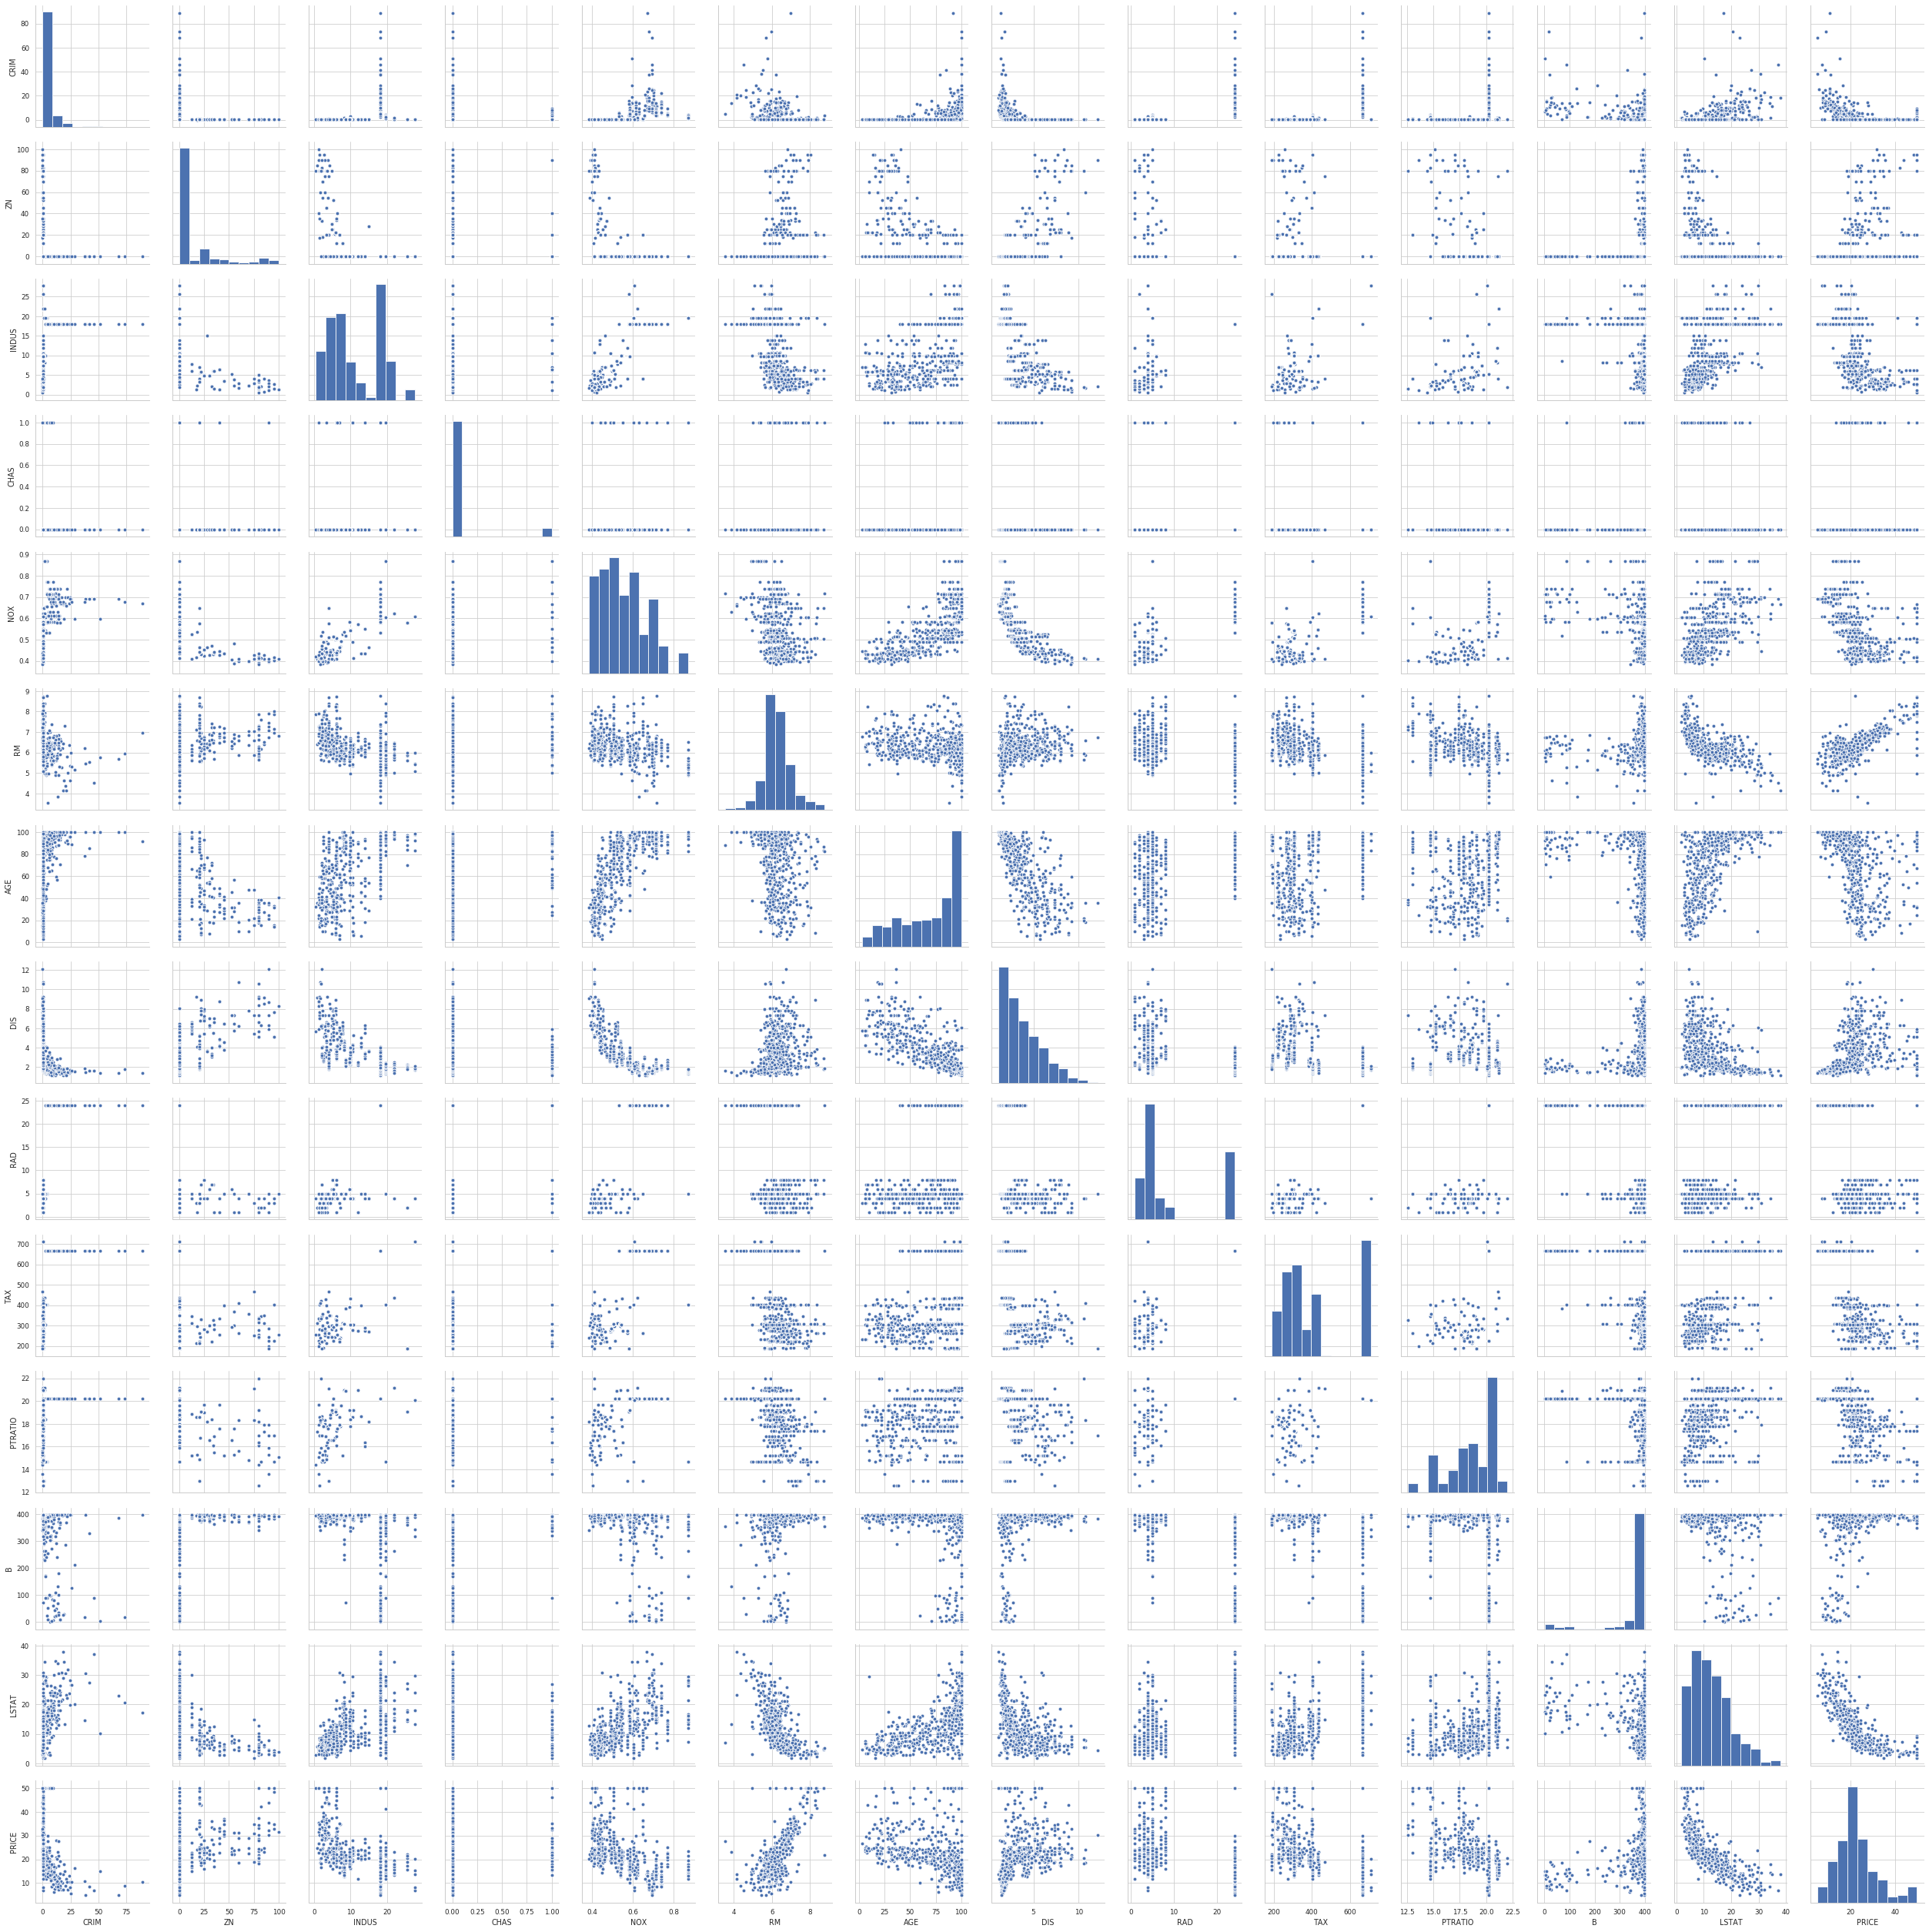

In [128]:
# Micro-Benchmarking (timing) a specific piece of code

# %timeit 
sb.pairplot(full_data)
plt.show() 

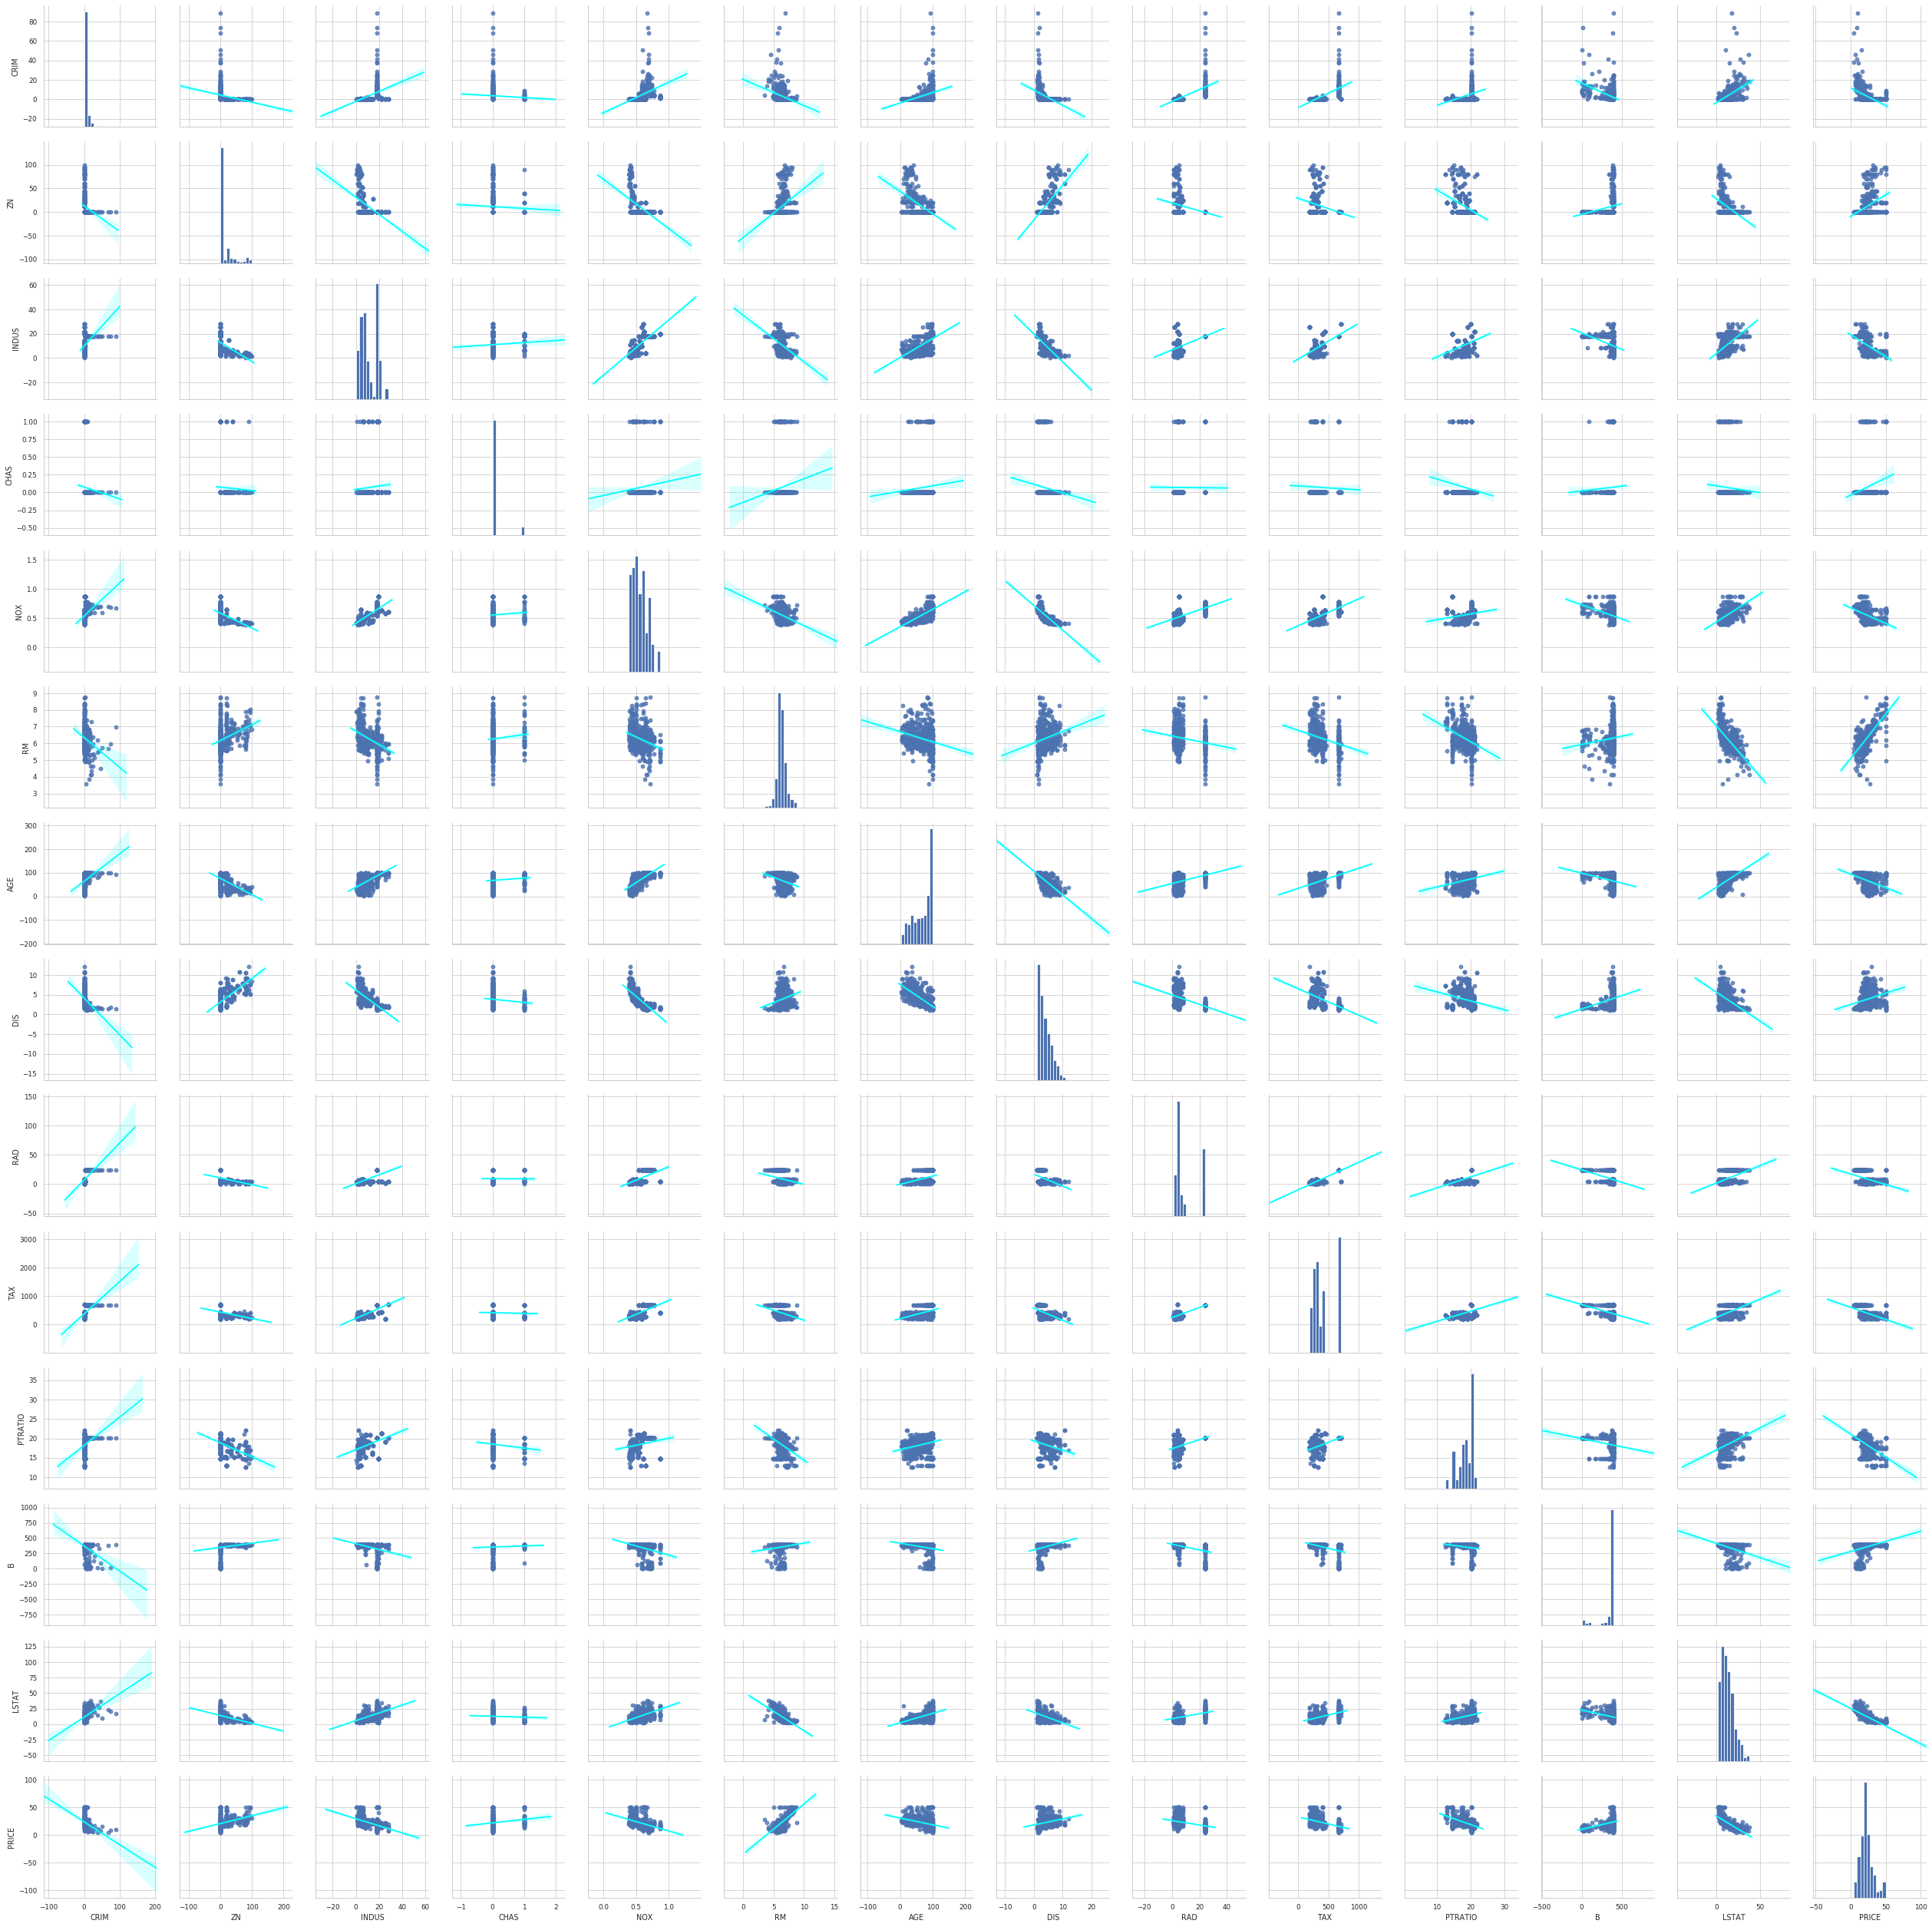

In [129]:
sb.pairplot(full_data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

# Multivariable Regression

In [130]:
features = full_data.drop(columns=['PRICE'])
price = full_data.PRICE

# Shuffles and splits data into train and test sets
# we want the algorithm to learn the theta values from 
# the training data only and for the test data to validate 
# the finding. The test data will be new data and so the
# model will reveal its true ability.
x_train, x_test, y_train, y_test = train_test_split(features, price,
                                                   test_size=0.2, 
                                                   random_state=10)


# % of training set 
len(x_train)/len(features)
# % of test data set
len(x_test)/len(features)

regr = LinearRegression()
regr.fit(x_train, y_train)

# Do the theta values make sense?
print('Intercept: ', regr.intercept_)
thetas_df = pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['Theta Values (coef)'])
print(thetas_df)

# How well does the model fit the data?
print('Training Data R-Squared: ',regr.score(x_train, y_train))
print('Test Data R-Squared: ',regr.score(x_test, y_test))

Intercept:  36.53305138282393
         Theta Values (coef)
CRIM               -0.128181
ZN                  0.063198
INDUS              -0.007576
CHAS                1.974515
NOX               -16.271989
RM                  3.108456
AGE                 0.016292
DIS                -1.483014
RAD                 0.303988
TAX                -0.012082
PTRATIO            -0.820306
B                   0.011419
LSTAT              -0.581626
Training Data R-Squared:  0.750121534530608
Test Data R-Squared:  0.670933983911563


# Data Transformations
##### Try transforming price data to improve model. Then run regression.
##### Applying some calculation to all elements in a data set is a transformation.

In [131]:
full_data.PRICE.skew()

1.1080984082549072

In [132]:
y_log = np.log(full_data.PRICE)
y_log.skew() # with log we get skew closer to zero

-0.33032129530987864

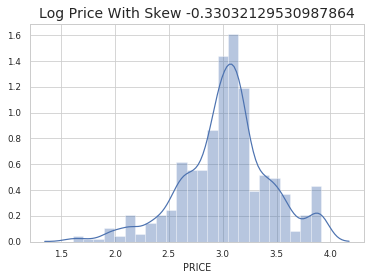

In [133]:
sb.distplot(y_log)
plt.title(f'Log Price With Skew {y_log.skew()}', fontsize=14)
plt.show()

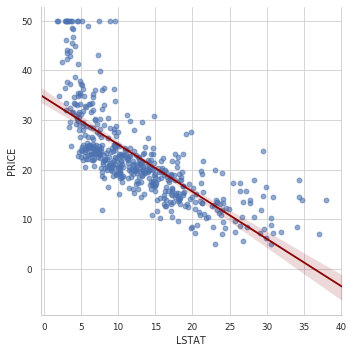

In [134]:
sb.lmplot(x='LSTAT', y='PRICE', data=full_data, 
          scatter_kws={'alpha':0.6}, 
          line_kws={'color':'darkred'})
plt.show()

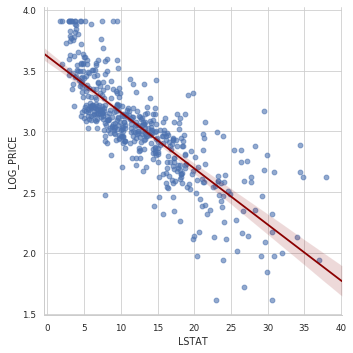

In [135]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sb.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, 
          scatter_kws={'alpha':0.6}, 
          line_kws={'color':'darkred'})
plt.show()

# Regression using log prices

In [136]:
features = full_data.drop(columns=['PRICE'])
log_price = np.log(full_data.PRICE) # LOG PRICES

x_train, x_test, y_train, y_test = train_test_split(features, log_price,
                                                   test_size=0.2, 
                                                   random_state=10)

regr = LinearRegression()
regr.fit(x_train, y_train)

# Do the theta values make sense?
print('Intercept: ', regr.intercept_)
thetas_df = pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['Theta Values (coef)'])
print(thetas_df)

# How well does the model fit the data?
print('Training Data R-Squared: ',regr.score(x_train, y_train))
print('Test Data R-Squared: ',regr.score(x_test, y_test))

# Coefficient of Determination improved on both train and test 
# sets because we transformed the target data. Higher r-squared 
# Because we reduced the skew in our target variable using a
# log transformation, we received a higher r-squared and a better fit.

# This interpretation of the theta values has changed because of the 
# log transformation.

Intercept:  4.059943871775181
         Theta Values (coef)
CRIM               -0.010672
ZN                  0.001579
INDUS               0.002030
CHAS                0.080331
NOX                -0.704068
RM                  0.073404
AGE                 0.000763
DIS                -0.047633
RAD                 0.014565
TAX                -0.000645
PTRATIO            -0.034795
B                   0.000516
LSTAT              -0.031390
Training Data R-Squared:  0.7930234826697584
Test Data R-Squared:  0.744692230626073


In [137]:
# Charles river property premium

# times 1000 because data is in 1000s
np.e**0.080331 * 1000

1083.6456950439142

# p-Values & Evaluating Coefficients

In [138]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

#results.params
#results.pvalues:
pd.DataFrame({'Thetas':results.params, 'p-Values':round(results.pvalues, 3)})

# Two of the features (AGE & INDUS) do not 
# appear to add much additional information

/home/zidakin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Thetas,p-Values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


# Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT$$

$$ VIF _ {TAX} = \frac{1}{(1-R _{TAX} ^ 2)}$$

In [139]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

1.7145250443932485

In [140]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=i) for i in range(x_incl_const.shape[1])]
vif_df = pd.DataFrame({'Theta_Name (coeff)':x_incl_const.columns,
             'VIF':np.around(vif, 2)})
vif_df.drop(index=0, inplace=True)

# vif greater than 10 would be considered problematic 
# some say greater than 5 

In [141]:
vif_df

,Theta_Name (coeff),VIF
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31
10,TAX,8.51


# Model Simplification
#### Baysian Information Criterion (BIC)

In [142]:
# Original Model With Log Prices & All Features
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'Thetas':results.params, 'p-Values':round(results.pvalues, 3)})

# Challenge: Print out BIC and R-Squared
print('BIC:', results.bic)
print('R-Squared:', results.rsquared)

BIC: -139.74997769478898
R-Squared: 0.7930234826697584


In [143]:
# Reduced Model #1 Excluding INDUS
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'Thetas':results.params, 'p-Values':round(results.pvalues, 3)})

# Challenge: Print out BIC and R-Squared
print('BIC:', results.bic)
print('R-Squared:', results.rsquared)

BIC: -145.14508855591163
R-Squared: 0.7927126289415163


In [144]:
# Reduced Model #1 Excluding INDUS & AGE
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'Thetas':results.params, 'p-Values':round(results.pvalues, 3)})

# Challenge: Print out BIC and R-Squared
print('BIC:', results.bic)
print('R-Squared:', results.rsquared)

BIC: -149.49934294224678
R-Squared: 0.7918657661852815


In [145]:
frames = [org_coef, coef_minus_indus, reduced_coef]

pd.concat(frames, axis=1, sort=True)

,Thetas,p-Values,Thetas,p-Values,Thetas,p-Values
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


# Residuals & Residual Plots

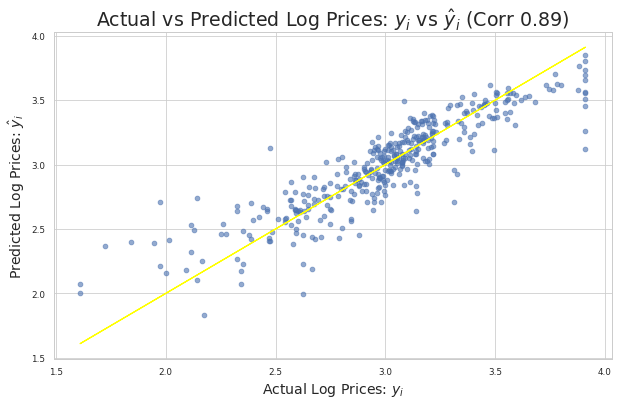

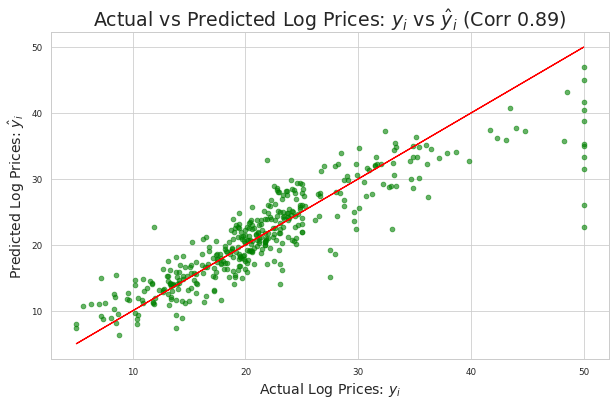

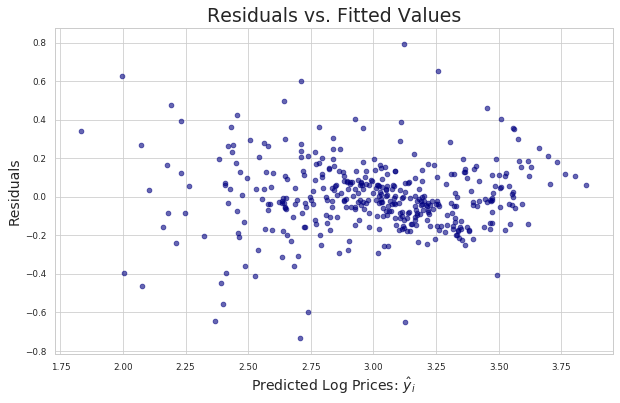

Residual Mean:  0.0
Residual Skew:  0.118


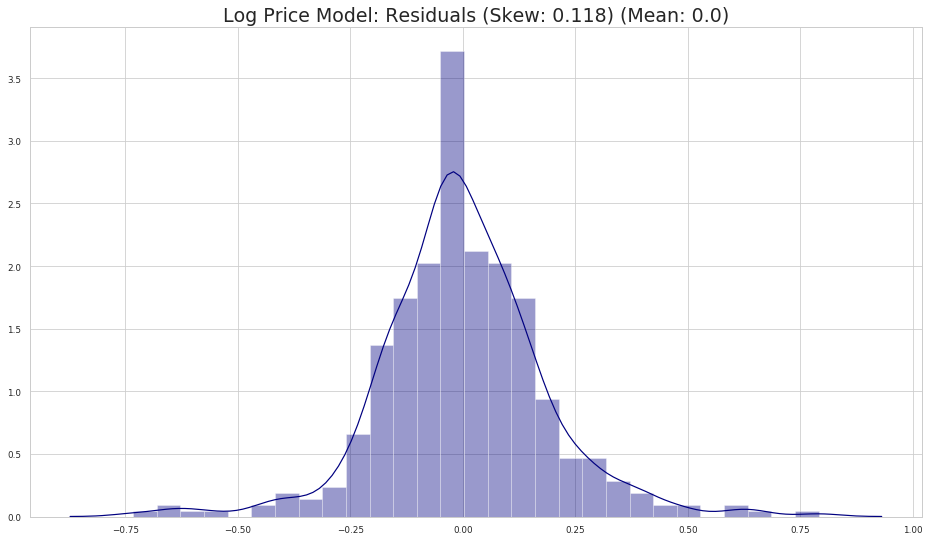

In [146]:
# Modified Model: Transformed (Using Log Prices)
# Simplified (dropping two features)
features = full_data.drop(columns=['PRICE', 'INDUS', 'AGE'], axis=1)
log_price = np.log(full_data.PRICE) #LOG PRICES


x_train, x_test, y_train, y_test = train_test_split(features, log_price,
                                                   test_size=0.2, 
                                                   random_state=10)

# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Residuals 
#residuals = y_train - results.fittedvalues
residuals = results.resid

# Graph of Actual vs Predicted Prices 
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=[10,6])
plt.scatter(x=y_train, y=results.fittedvalues, alpha=0.6)

plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y _i$ (Corr {corr})',
         fontsize=19)
plt.xlabel('Actual Log Prices: $y _i$', fontsize=14)
plt.ylabel('Predicted Log Prices: $\haty _i$', fontsize=14)
plt.plot(y_train, y_train, color='yellow')
plt.show()


plt.figure(figsize=[10,6])
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, 
            alpha=0.6, color='green')

plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y _i$ (Corr {corr})',
         fontsize=19)
plt.xlabel('Actual Log Prices: $y _i$', fontsize=14)
plt.ylabel('Predicted Log Prices: $\haty _i$', fontsize=14)
plt.plot(np.e**y_train, np.e**y_train, color='red')
plt.show()

# The line represents where yhat would be equal to y 


# Residuals Vs. Predicted Values
plt.figure(figsize=[10,6])
plt.scatter(x=results.fittedvalues, y=results.resid, 
            alpha=0.6, color='navy')

plt.title('Residuals vs. Fitted Values', fontsize=19)
plt.xlabel('Predicted Log Prices: $\haty _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Distribution of Residuals (Log Prices) - Checking for Normality 
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
print('Residual Mean: ', resid_mean)
print('Residual Skew: ', resid_skew)


plt.figure(figsize=[16,9])
sb.distplot(results.resid, color='navy')
plt.title(f'Log Price Model: Residuals (Skew: {resid_skew}) (Mean: {resid_mean})',
         fontsize=19)
plt.show()



# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


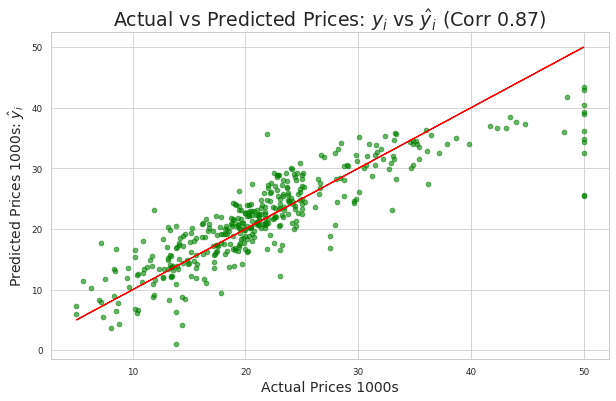

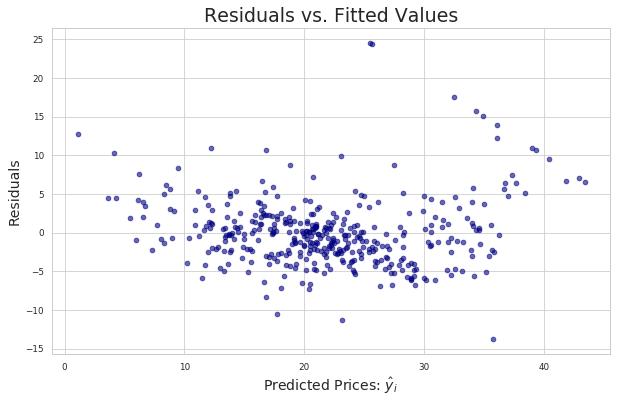

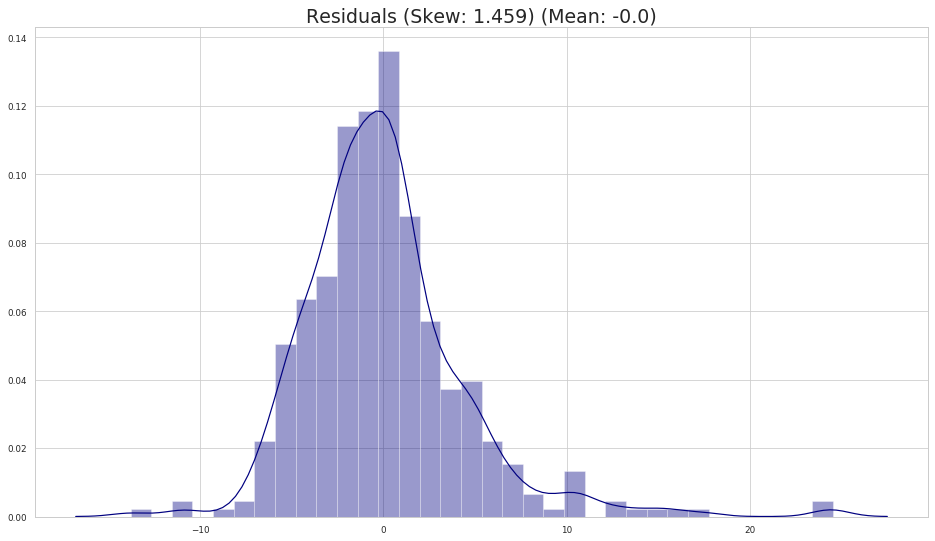

In [147]:
# Original Model: Normal Prices & Including All Features
features = full_data.drop(columns=['PRICE'])
price = full_data.PRICE

x_train, x_test, y_train, y_test = train_test_split(features, price,
                                                   test_size=0.2, 
                                                   random_state=10)

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues), 2)

# Actual vs. Predicted Values 
plt.figure(figsize=[10,6])
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y _i$ (Corr {corr})',
         fontsize=19)
plt.scatter(x=y_train, y=results.fittedvalues, 
            alpha=0.6, color='green')
plt.plot(y_train, y_train, color='red')
plt.ylabel('Predicted Prices 1000s: $\haty _i$', fontsize=14)
plt.xlabel('Actual Prices 1000s', fontsize=14)
plt.show()

# Residuals Vs. Predicted Values
plt.figure(figsize=[10,6])
plt.scatter(x=results.fittedvalues, y=results.resid, 
            alpha=0.6, color='navy')
plt.title('Residuals vs. Fitted Values', fontsize=19)
plt.xlabel('Predicted Prices: $\haty _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residual 
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=[16,9])
sb.distplot(results.resid, color='navy')
plt.title(f'Residuals (Skew: {resid_skew}) (Mean: {resid_mean})',
         fontsize=19)
plt.show()



# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

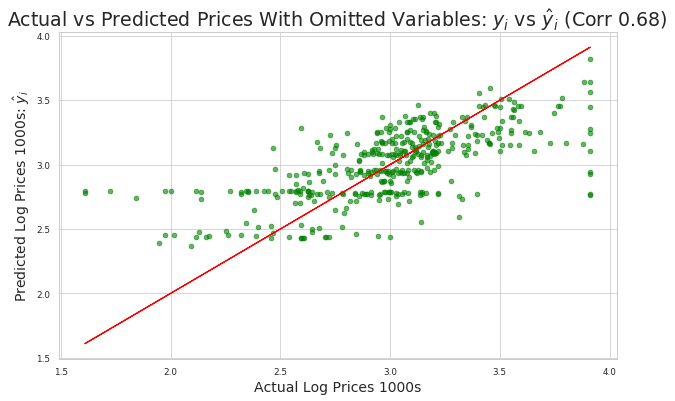

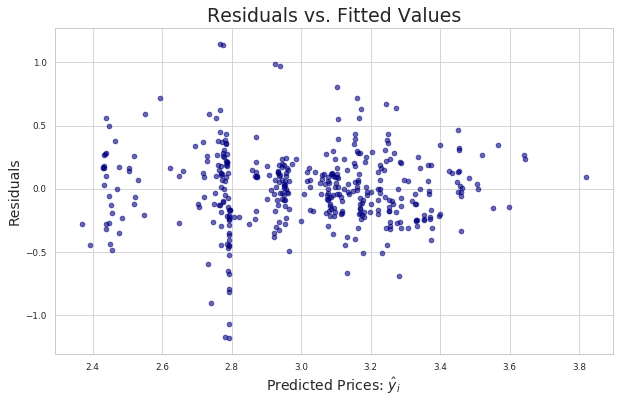

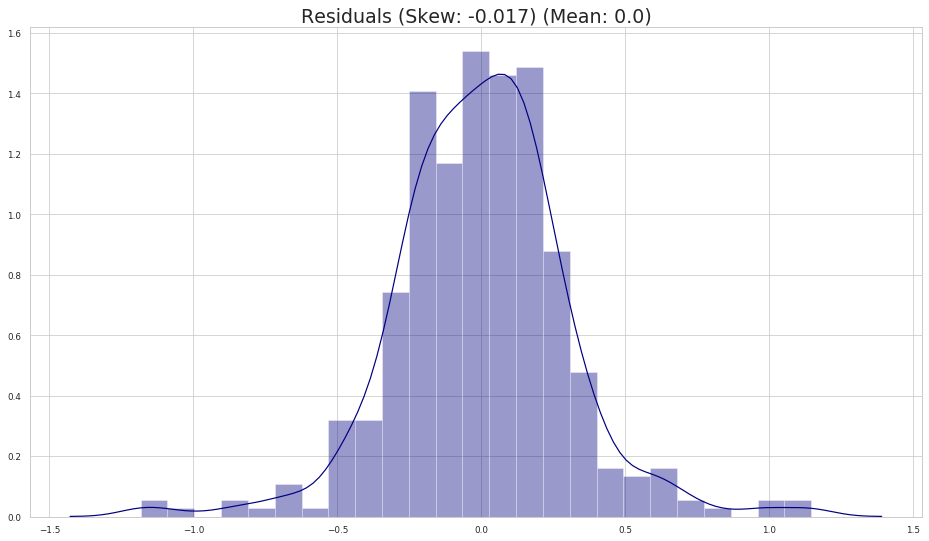

In [148]:
# Model Omitting Key Features: Log Prices 
features = full_data.drop(columns=['PRICE', 'INDUS', 'AGE',
                                  'LSTAT', 'NOX', 'RM', 'CRIM'],
                         axis=1)
price = np.log(full_data.PRICE)

x_train, x_test, y_train, y_test = train_test_split(features, price,
                                                   test_size=0.2, 
                                                   random_state=10)

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues), 2)

# Actual vs. Predicted Values 
plt.figure(figsize=[10,6])
plt.title(f'Actual vs Predicted Prices With Omitted Variables: $y _i$ vs $\hat y _i$ (Corr {corr})',
         fontsize=19)
plt.scatter(x=y_train, y=results.fittedvalues, 
            alpha=0.6, color='green')
plt.plot(y_train, y_train, color='red')
plt.ylabel('Predicted Log Prices 1000s: $\haty _i$', fontsize=14)
plt.xlabel('Actual Log Prices 1000s', fontsize=14)
plt.show()

# Residuals Vs. Predicted Values
plt.figure(figsize=[10,6])
plt.scatter(x=results.fittedvalues, y=results.resid, 
            alpha=0.6, color='navy')
plt.title('Residuals vs. Fitted Values', fontsize=19)
plt.xlabel('Predicted Prices: $\haty _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residual 
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=[16,9])
sb.distplot(results.resid, color='navy')
plt.title(f'Residuals (Skew: {resid_skew}) (Mean: {resid_mean})',
         fontsize=19)
plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [149]:
pd.DataFrame({'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse], 
              'R-Squared':[reduced_log_rsquared, full_normal_rsquared,
                           omitted_var_rsquared],
             'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
            index=['Reduced Log Model', 'Full Normal Price Model',
                  'Omitted Variable Model'])

,MSE,R-Squared,RMSE
Reduced Log Model,0.035,0.792,0.187083
Full Normal Price Model,19.921,0.750,4.463295
Omitted Variable Model,0.090,0.460,0.300000


In [150]:
print('R-Squared is always between zero and one for every regression model')
print('rsquared is a relative measure of fit. It doesnt have any units.')
print('It does not scale with the data. It is always between zero and one.')
print('''


''')

print('MSE is an absolute measure of fit.')
print('MSE has units. Units of the target (y variable).')
print('Lower MSE means better fit. MSE of zero means a perfect fit.')

R-Squared is always between zero and one for every regression model
rsquared is a relative measure of fit. It doesnt have any units.
It does not scale with the data. It is always between zero and one.




MSE is an absolute measure of fit.
MSE has units. Units of the target (y variable).
Lower MSE means better fit. MSE of zero means a perfect fit.


In [151]:
# Our go to distribution is the normal distribution because 
# we know its shape. For a normal observation we know 68% 
# of the observations fall within one standard deviation from
# the mean, and 95% of the observations fall within two std from mean

In [152]:
# Challenge: For House Price of $30000.
# Calculate upper & lower bound for a 95% 
# prediction interval using the reduced log model

features = full_data.drop(columns=['PRICE', 'INDUS', 'AGE'], axis=1)
log_price = np.log(full_data.PRICE) #LOG PRICES


x_train, x_test, y_train, y_test = train_test_split(features, log_price,
                                                   test_size=0.2, 
                                                   random_state=10)

# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)


print('1 STD in log prices is: ', np.sqrt(reduced_log_mse))
print('2 STD in log prices is: ', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The Upper Bound in log prices for a 95% prediction interval is: ', upper_bound)
print('The Upper Bound for a 95% prediction interval is: $', np.e**upper_bound * 1000)


lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower Bound in log prices for a 95% prediction interval is: ', lower_bound)
print('The lower Bound for a 95% prediction interval is: $', np.e**lower_bound * 1000)

# RMSE represents one standard deviation of the differences between 
# our actual and predicted values. The RMSE is one standard deviation
# in the distribution of our residuals.


# RMSE tells the predictive power of our model.
# RMSE can also be used to compare models.
# Because RMSE is a good measure of how accurately the model
# predicts the target because we can determine a range.
# The width of this range is important

1 STD in log prices is:  0.18708286933869708
2 STD in log prices is:  0.37416573867739417
The Upper Bound in log prices for a 95% prediction interval is:  3.7753631203395495
The Upper Bound for a 95% prediction interval is: $ 43613.34233239937
The lower Bound in log prices for a 95% prediction interval is:  3.0270316429847615
The lower Bound for a 95% prediction interval is: $ 20635.886906824155


In [153]:
# THIS IS WRONG 
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 

31453.778077746647